# Exploratory Data Analysis:

This is the next installment in my capstone 3 project.

The goal of the model is to predict the mental health scores of racial/ethnic subgroups of the US population based on race/ethnicity, the unemployment rate change, and the change in total amount of unemployed people in the group. 
The reason for capturing this data, is to show economic strife impacts people in the economic system in place, which has systemic racism built into its foundations.  Because mental health is so important to success in society and personal wellbeing, it is up to the government and resource wealthy institutions to provide the resources necessary to the people going through a period of mental illness.  

The inputs will be race/ethnicity, unemployment rate change, unemployment amount change

The outputs are mental health scores based on the GAD 7 and PHQ 9 tests

In this notebook I will accomplish:

1.) Check for NAs, decide what to do with missing data

2.) View mental health scores in the different race/ethnicity subgroups (histograms); imputing missing values

3.) Y-Data Profiling

4.) View of the mental health score as a time series analysis to see if there are seasonal patterns in score

3.) Perform heatmap and t-test to test for relationships between variables and mental health scores

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.) Check for missing values/ edit dataframe

In [2]:
df = pd.read_csv('wrangled_data_v1.csv')

In [3]:
df.head()

,Unnamed: 0,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Start,End,Value,Low CI,High CI,Confidence Interval,Quartile Range,Year,Race,weighted_unemployment_rate_change,total_unemployed_change
0,0,Symptoms of Depressive Disorder,By Race/Hispanic ethnicity,United States,Hispanic or Latino,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,29.4,26.8,32.1,26.8 - 32.1,NaN,2020,Hispanic or Latino,6.168662,1771000.0
1,1,Symptoms of Anxiety Disorder,By Race/Hispanic ethnicity,United States,Hispanic or Latino,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,36.3,33.4,39.2,33.4 - 39.2,NaN,2020,Hispanic or Latino,6.168662,1771000.0
2,2,Symptoms of Anxiety Disorder or Depressive Dis...,By Race/Hispanic ethnicity,United States,Hispanic or Latino,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,42.7,39.7,45.7,39.7 - 45.7,NaN,2020,Hispanic or Latino,6.168662,1771000.0
3,3,Symptoms of Depressive Disorder,By Race/Hispanic ethnicity,United States,Hispanic or Latino,1,2,"May 7 - May 12, 2020",2020-05-07,2020-05-12,27.9,24.4,31.6,24.4 - 31.6,NaN,2020,Hispanic or Latino,6.168662,1771000.0
4,4,Symptoms of Anxiety Disorder,By Race/Hispanic ethnicity,United States,Hispanic or Latino,1,2,"May 7 - May 12, 2020",2020-05-07,2020-05-12,36.2,32.6,39.9,32.6 - 39.9,NaN,2020,Hispanic or Latino,6.168662,1771000.0


In [4]:
df = df.drop(columns='Unnamed: 0')

In [5]:
df.describe()

,Time Period,Value,Low CI,High CI,Quartile Range,Year,weighted_unemployment_rate_change,total_unemployed_change
count,696.00000,600.000000,600.000000,600.000000,0.0,696.000000,696.000000,6.960000e+02
mean,22.12069,29.658833,27.467833,31.941667,NaN,2020.810345,0.400916,1.522672e+05
std,15.85119,6.894467,6.874335,7.001211,NaN,0.753854,4.146465,2.059978e+06
min,1.00000,14.000000,11.900000,16.300000,NaN,2020.000000,-3.833699,-3.236000e+06
25%,7.00000,24.800000,22.600000,27.100000,NaN,2020.000000,-2.900000,-7.752500e+05
50%,21.50000,29.600000,27.400000,31.700000,NaN,2021.000000,-2.355834,-3.650000e+05
75%,36.00000,34.300000,32.100000,36.725000,NaN,2021.000000,5.395916,1.053000e+06
max,50.00000,48.200000,45.600000,50.900000,NaN,2022.000000,6.168662,4.931000e+06


In [6]:
df.isna().sum()

Indicator                              0
Group                                  0
State                                  0
Subgroup                               0
Phase                                  0
Time Period                            0
Time Period Label                      0
Start                                  0
End                                    0
Value                                 96
Low CI                                96
High CI                               96
Confidence Interval                   96
Quartile Range                       696
Year                                   0
Race                                   0
weighted_unemployment_rate_change      0
total_unemployed_change                0
dtype: int64

We can drop Low CI, High CI, and Confidence Interval as they are redundant information; quartile range is too complicated to be useful for model

In [7]:
df =df.drop(columns=['Low CI','High CI','Confidence Interval','Quartile Range'])

In [8]:
df.shape

(696, 14)

We lost 174 observation because we didnt have unemployment information on that fifth race/ethnic group: other

In [9]:
df.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Start,End,Value,Year,Race,weighted_unemployment_rate_change,total_unemployed_change
0,Symptoms of Depressive Disorder,By Race/Hispanic ethnicity,United States,Hispanic or Latino,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,29.4,2020,Hispanic or Latino,6.168662,1771000.0
1,Symptoms of Anxiety Disorder,By Race/Hispanic ethnicity,United States,Hispanic or Latino,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,36.3,2020,Hispanic or Latino,6.168662,1771000.0
2,Symptoms of Anxiety Disorder or Depressive Dis...,By Race/Hispanic ethnicity,United States,Hispanic or Latino,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,42.7,2020,Hispanic or Latino,6.168662,1771000.0
3,Symptoms of Depressive Disorder,By Race/Hispanic ethnicity,United States,Hispanic or Latino,1,2,"May 7 - May 12, 2020",2020-05-07,2020-05-12,27.9,2020,Hispanic or Latino,6.168662,1771000.0
4,Symptoms of Anxiety Disorder,By Race/Hispanic ethnicity,United States,Hispanic or Latino,1,2,"May 7 - May 12, 2020",2020-05-07,2020-05-12,36.2,2020,Hispanic or Latino,6.168662,1771000.0


State, Group, Phase Time Period, Race, Year, Time Period Label, End are redundant or not useful in providing information

In [10]:
df =df.drop(columns=['Group','State','Phase','Time Period Label','Time Period','End','Race'])

In [11]:
df.loc[df['Value'].isna(), 'Subgroup'].value_counts()

Subgroup
Hispanic or Latino                 24
Non-Hispanic White, single race    24
Non-Hispanic Black, single race    24
Non-Hispanic Asian, single race    24
Name: count, dtype: int64

# 2.) Examining Mental Health Scores from different Race/Ethnicities perspectives and Imputing Missing Values

In [12]:
print ((list(df['Subgroup'].unique())))

['Hispanic or Latino', 'Non-Hispanic White, single race', 'Non-Hispanic Black, single race', 'Non-Hispanic Asian, single race']


In [13]:
def subgroup_hist_gen(df):
    
    subgroups = list(df['Subgroup'].unique())
    
    for x in subgroups:
        plt.hist(df.loc[df['Subgroup']==x, 'Value'])
        plt.xlabel('Mental Health Survey Scores')
        plt.ylabel('Counts')
        plt.title(f'Histogram of {x} mental health scores')
        plt.show()
        

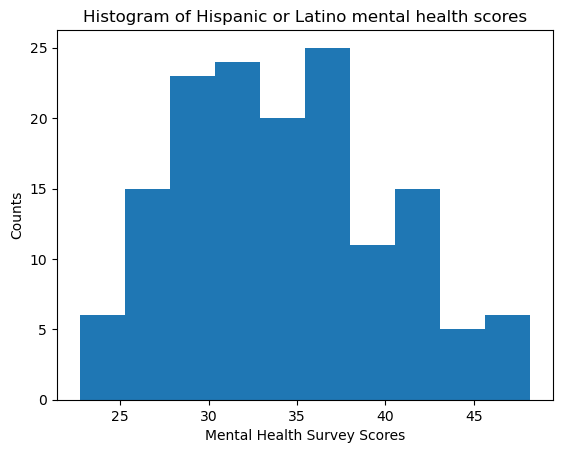

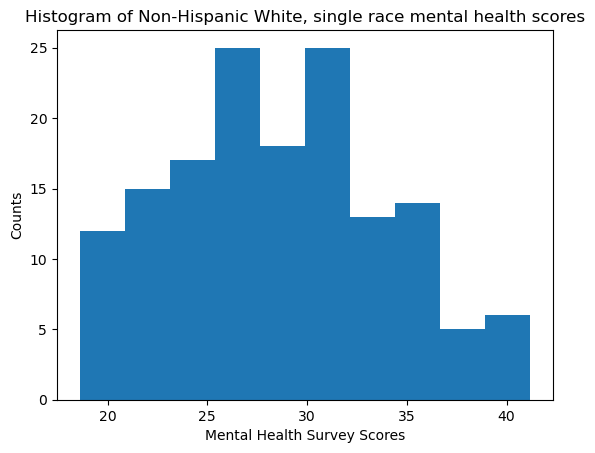

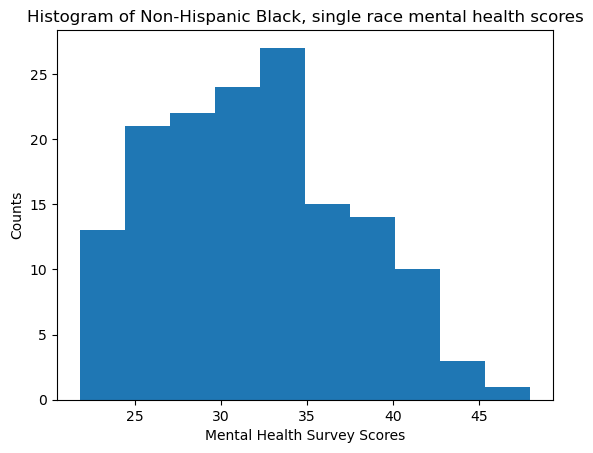

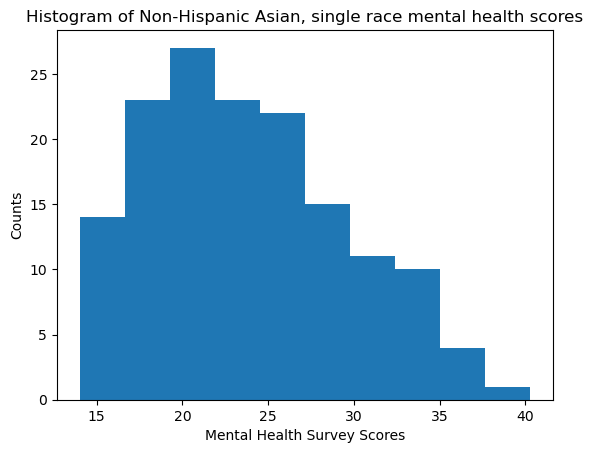

In [14]:
hist_subgroups = subgroup_hist_gen(df)

In [15]:
df['Value'].groupby(by=df['Subgroup']).mean()

Subgroup
Hispanic or Latino                 34.124000
Non-Hispanic Asian, single race    23.855333
Non-Hispanic Black, single race    32.010667
Non-Hispanic White, single race    28.645333
Name: Value, dtype: float64

In [16]:
df['Value'].groupby(by=df['Subgroup']).median()

Subgroup
Hispanic or Latino                 33.65
Non-Hispanic Asian, single race    23.30
Non-Hispanic Black, single race    31.75
Non-Hispanic White, single race    28.20
Name: Value, dtype: float64

Before we impute lets break up the distributions by year now

In [17]:
def subgroup_by_year(df):
    years=[2020, 2021, 2022]
    subgroups = list(df['Subgroup'].unique())
    for x in subgroups:
        sub_frame = df.loc[df['Subgroup']==x]
        for y in years:
            plt.hist(sub_frame.loc[sub_frame['Year']==y, 'Value'])
            plt.xlabel('Mental Health Survey Scores')
            plt.ylabel('Counts')
            plt.title(f'Histogram of {x} mental health scores in {y}')
            plt.show()
            

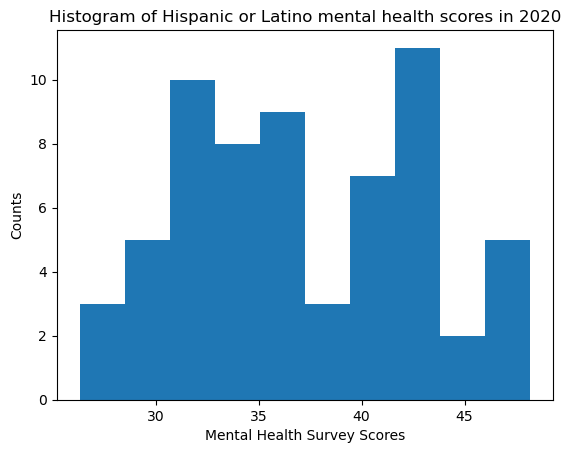

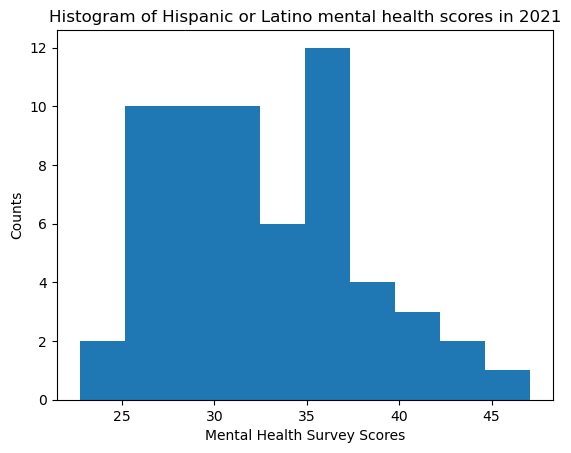

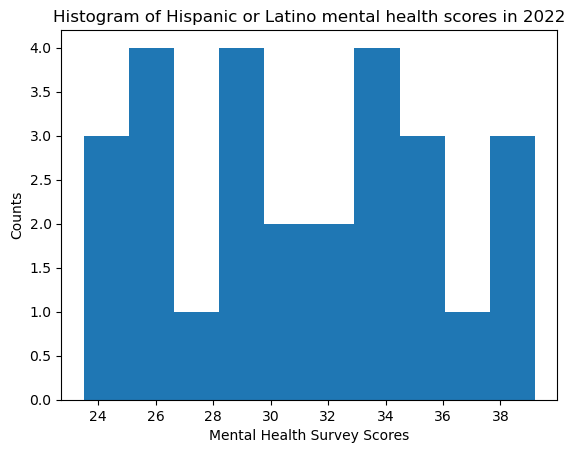

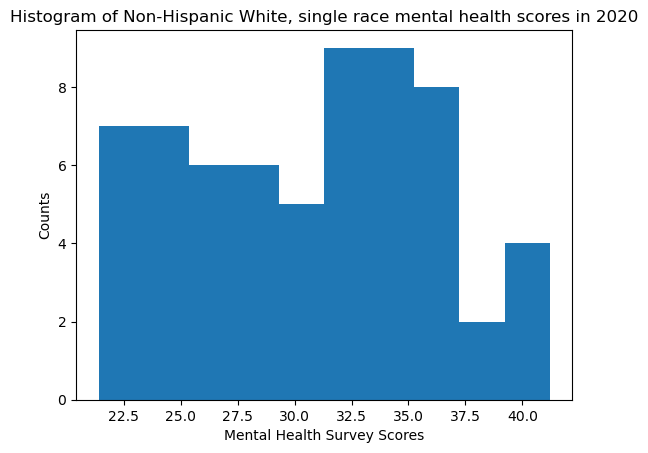

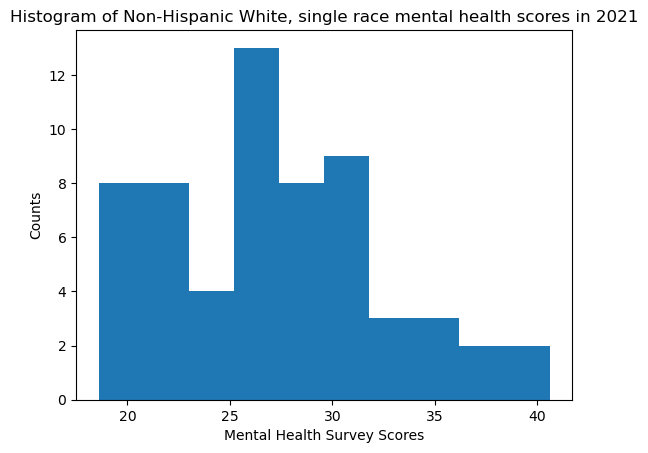

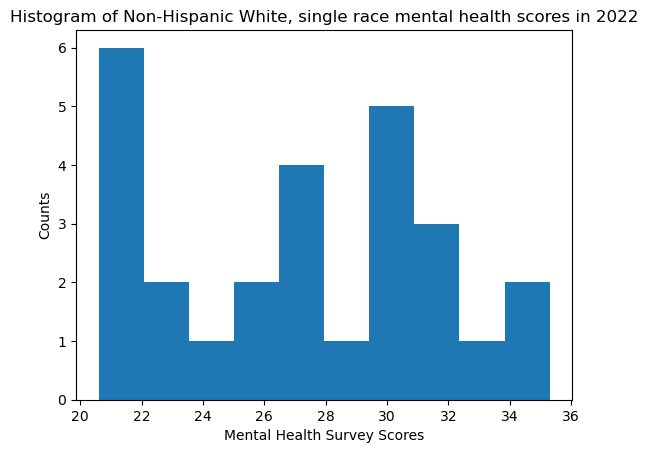

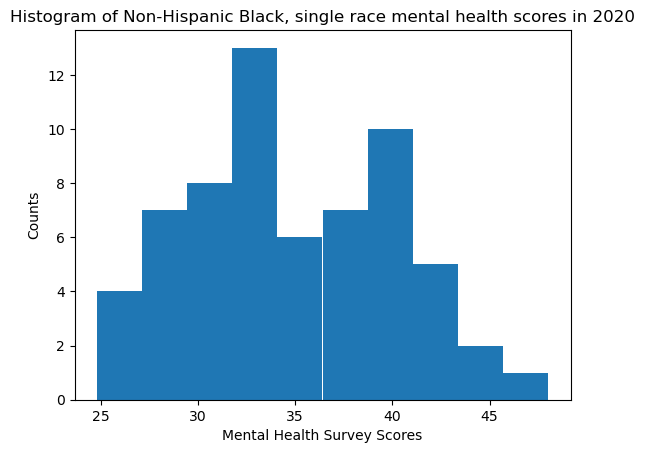

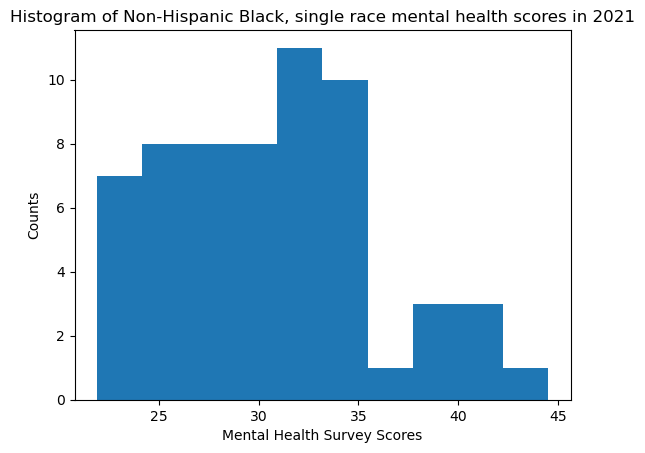

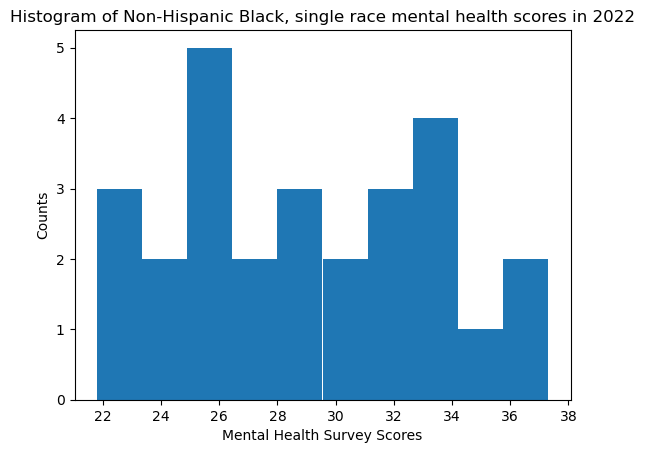

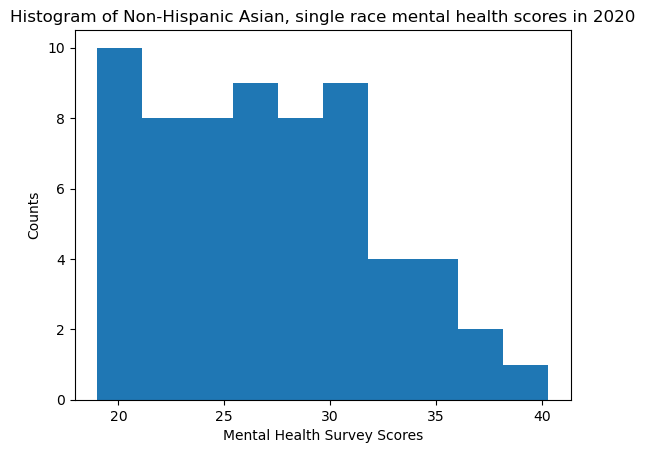

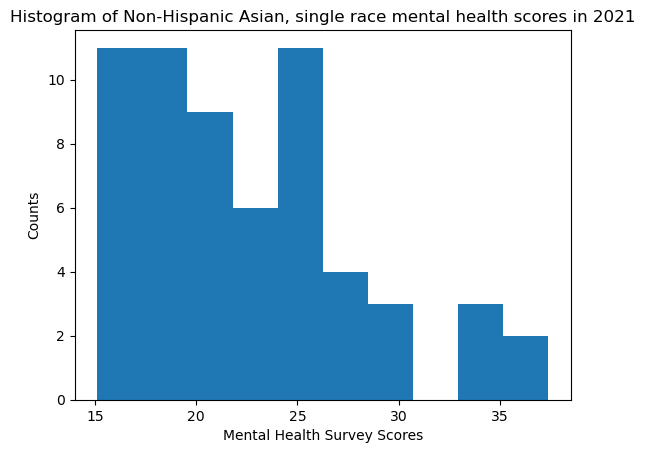

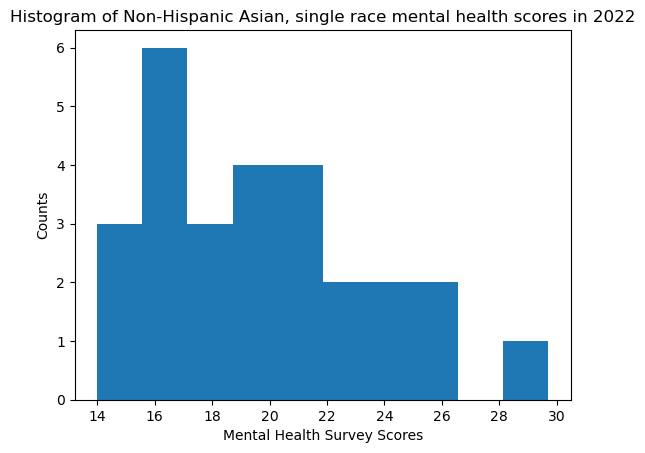

In [18]:
year_hist = subgroup_by_year(df)

In [19]:
def mean_median_scores_by_year(df):
    years=[2020, 2021, 2022]
    subgroups = list(df['Subgroup'].unique())
    for x in subgroups:
        sub_frame = df.loc[df['Subgroup']==x]
        mean = sub_frame['Value'].groupby(sub_frame['Year']).mean()
        median = sub_frame['Value'].groupby(sub_frame['Year']).median()
        print (f'{x}, {mean}, {median}')
            

In [20]:
year_mean_median = mean_median_scores_by_year(df)

Hispanic or Latino, Year
2020    36.947619
2021    32.545000
2022    31.044444
Name: Value, dtype: float64, Year
2020    36.40
2021    32.05
2022    31.00
Name: Value, dtype: float64
Non-Hispanic White, single race, Year
2020    30.622222
2021    27.231667
2022    27.174074
Name: Value, dtype: float64, Year
2020    31.30
2021    26.85
2022    27.20
Name: Value, dtype: float64
Non-Hispanic Black, single race, Year
2020    34.763492
2021    30.480000
2022    28.988889
Name: Value, dtype: float64, Year
2020    34.0
2021    30.4
2022    28.6
Name: Value, dtype: float64
Non-Hispanic Asian, single race, Year
2020    26.863492
2021    22.581667
2022    19.666667
Name: Value, dtype: float64, Year
2020    26.4
2021    21.7
2022    19.0
Name: Value, dtype: float64


It seems that mental health is improving accross the board as unemployment rate decrease, lets check for the actual correlation in the next step.  Lets impute with the mean for each year in each subgroup.

In [21]:
def imputer_by_group_and_year(df):
    years=[2020, 2021, 2022]
    subgroups = list(df['Subgroup'].unique())
    new_df = pd.DataFrame()
    for y in subgroups:
        new_ind = [x for x in range(len(df['Subgroup'])) if df['Subgroup'][x] == y]
        means = list((df.loc[new_ind, 'Value'].groupby(df['Year']).mean()).values)
        sel = df.loc[new_ind]
        for z in range(3):
            year_sel = sel[sel['Year']==years[z]]
            year_sel = year_sel.fillna(means[z])
            new_df = pd.concat([new_df, year_sel], axis=0)
    
    
    
    
    
    return new_df
    

In [22]:
tidy_df = imputer_by_group_and_year(df)

In [23]:
tidy_df.head()

,Indicator,Subgroup,Start,Value,Year,weighted_unemployment_rate_change,total_unemployed_change
0,Symptoms of Depressive Disorder,Hispanic or Latino,2020-04-23,29.4,2020,6.168662,1771000.0
1,Symptoms of Anxiety Disorder,Hispanic or Latino,2020-04-23,36.3,2020,6.168662,1771000.0
2,Symptoms of Anxiety Disorder or Depressive Dis...,Hispanic or Latino,2020-04-23,42.7,2020,6.168662,1771000.0
3,Symptoms of Depressive Disorder,Hispanic or Latino,2020-05-07,27.9,2020,6.168662,1771000.0
4,Symptoms of Anxiety Disorder,Hispanic or Latino,2020-05-07,36.2,2020,6.168662,1771000.0


# 3.) Y-Data Profile Summary

In [24]:
import requests

import ydata_profiling
from ydata_profiling.utils.cache import cache_file
from pathlib import Path

In [25]:
#report = tidy_df.profile_report(
#    sort=None, html={"style": {"full_width": True}}, progress_bar=False)
#report

## Key takeaways:
positives: there is no missing data, the distribution of mental health scores in gaussian, there is around 700 observations to work with, with the removal of the scores from the other group in the subgroup, now the max is 48, which is the max for the GAD-7(21) + PHQ-9(27) score, so translatability is better

negatives: the correlation with all of the scores and the unemployment rate change/ unemployement change is difficult to parse out in the graphical representations, there is less observations from 2022 compared to 2021 and 2020

# 4.) Time series view of mental health scores

In [26]:
time_df = tidy_df[['Start','Value']]

In [27]:
time_df['Start']= pd.to_datetime(time_df['Start'])

/var/folders/w4/swg_x0mn7sl_p9j90gy4tmk80000gn/T/ipykernel_10809/1669203809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_df['Start']= pd.to_datetime(time_df['Start'])


In [28]:
time_df = time_df.rename(columns={'Start':'Date'})

In [29]:
time_df = time_df.set_index(time_df['Date'])

In [30]:
time_df= time_df.drop(columns='Date')

Text(0.5, 1.0, 'Mental Health Scores in the US from 2020-2022')

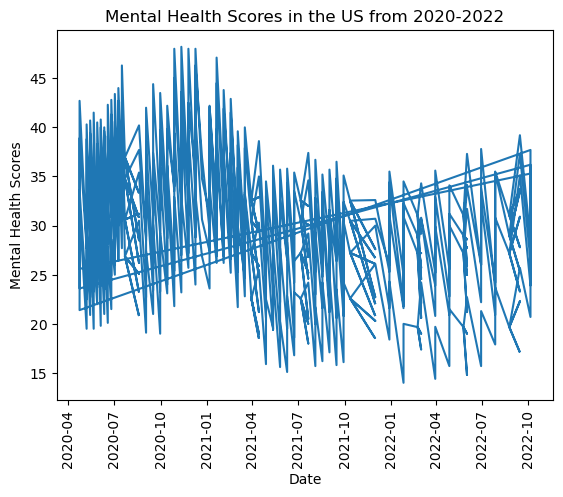

In [31]:
plt.plot(time_df.index,time_df['Value'])
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Mental Health Scores')
plt.title('Mental Health Scores in the US from 2020-2022')

Text(0.5, 1.0, 'Mental Health Scores in the US from 2020-2022')

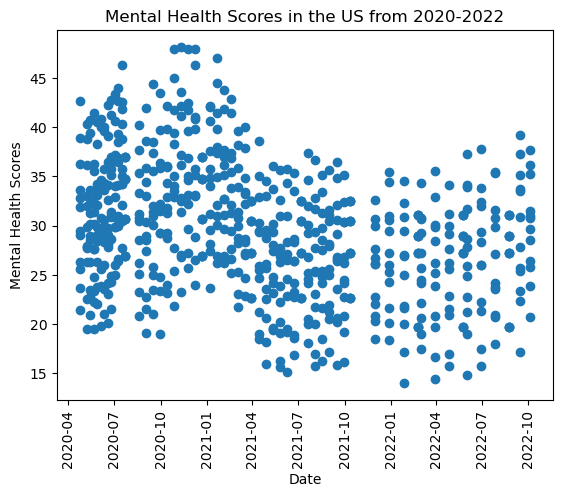

In [32]:
plt.scatter(time_df.index,time_df['Value'])
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Mental Health Scores')
plt.title('Mental Health Scores in the US from 2020-2022')

Since in this time series analysis, there is no apprarent trend or seasonality due to limited years, no seasonal/trend decomposition will take place.  Lets move ahead and visualize with the unemployment rate change/ unemployment number change/ and subgroup as the hue in a seaborn scatter plot.

In [33]:
def scores_with_hues(df, col):
    new_df = df[['Start','Value',col]]
    
    #new_df['Start']= pd.to_datetime(new_df['Start'])

    new_df = new_df.rename(columns={'Start':'Date'})

    new_df = new_df.set_index(new_df['Date'])

    new_df= new_df.drop(columns='Date')
    
    myplot = sns.scatterplot(x=new_df.index, y="Value", hue=col, data=new_df)
    myplot.set_xticklabels(myplot.get_xticklabels(),rotation=90)
    #sns.move_legend(myplot, "upper right")
    plt.legend(title=col, fontsize='7', title_fontsize='8')
    plt.show()

In [34]:
desired_col = ['Subgroup','weighted_unemployment_rate_change','total_unemployed_change']

/var/folders/w4/swg_x0mn7sl_p9j90gy4tmk80000gn/T/ipykernel_10809/911727674.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  myplot.set_xticklabels(myplot.get_xticklabels(),rotation=90)


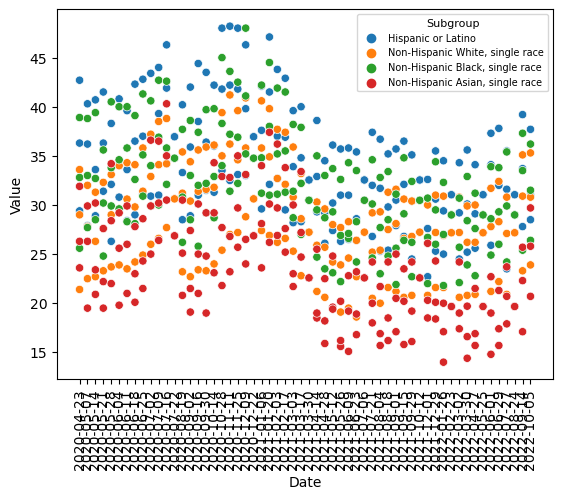

/var/folders/w4/swg_x0mn7sl_p9j90gy4tmk80000gn/T/ipykernel_10809/911727674.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  myplot.set_xticklabels(myplot.get_xticklabels(),rotation=90)


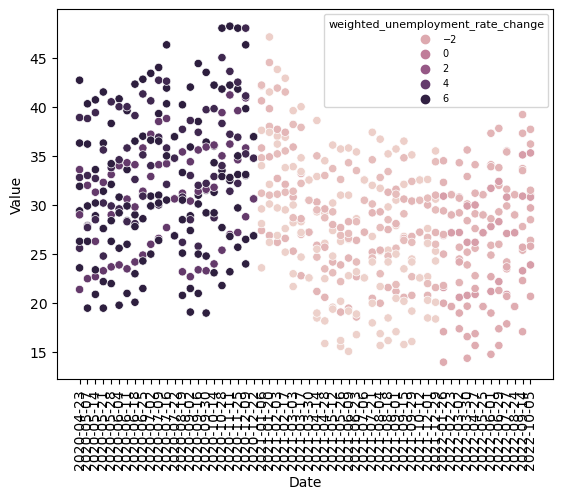

/var/folders/w4/swg_x0mn7sl_p9j90gy4tmk80000gn/T/ipykernel_10809/911727674.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  myplot.set_xticklabels(myplot.get_xticklabels(),rotation=90)


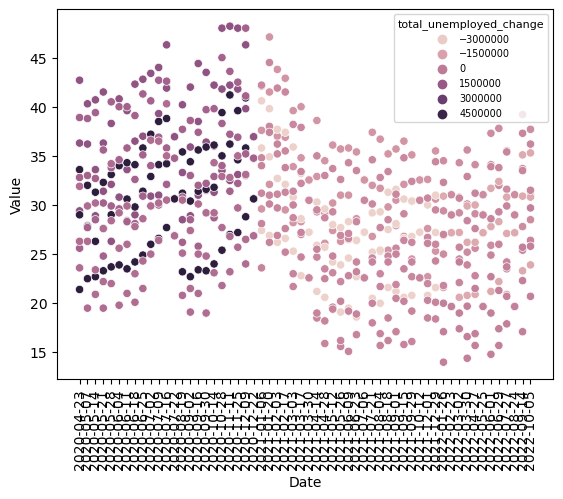

In [35]:
for x in desired_col:
    plotting = scores_with_hues(tidy_df, x)

With the unemployment change and rate change, these are differences, so the positive number would reflect an increase in unemployment and an increase in the unemployment rate.

With that in mind, during the 2020 to 2021 change, the mental health scores and unemployment, unemployment rate are at their highest, with everything being lowered in the 2021 to 2022 change.  

Looking at the subgroups, the Black and Latino subgroups are more heavily impacted in mental health during the economic crises compared to the White and Asian subgroups.

# 5.) Probing for relationships with the data and the Mental Health Scores

## Heatmap

In [36]:
tidy_df = tidy_df.rename(columns={'Start':'Date'})

In [37]:
num_df = tidy_df[['Value','weighted_unemployment_rate_change','total_unemployed_change']]

In [38]:
print (num_df.corr())

                                      Value  \
Value                              1.000000   
weighted_unemployment_rate_change  0.335268   
total_unemployed_change            0.230631   

                                   weighted_unemployment_rate_change  \
Value                                                       0.335268   
weighted_unemployment_rate_change                           1.000000   
total_unemployed_change                                     0.676318   

                                   total_unemployed_change  
Value                                             0.230631  
weighted_unemployment_rate_change                 0.676318  
total_unemployed_change                           1.000000  


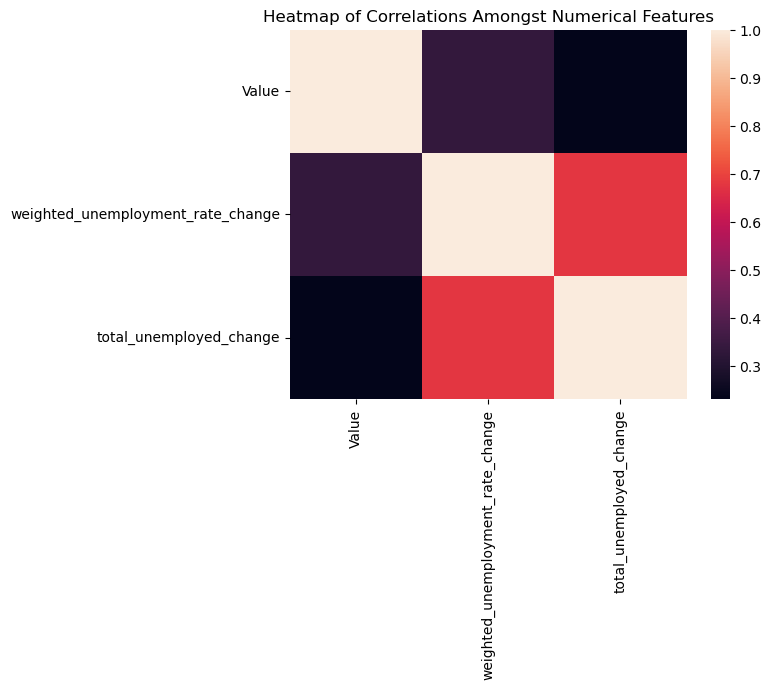

In [39]:
sns.heatmap(num_df.corr())
plt.title('Heatmap of Correlations Amongst Numerical Features')
plt.show()

the mental health scores have a pearson correlation of around .23 with the total change in unemployment and .34 with the weighted unemployment rate change.  The change in unemployement and unemployement rate change are correlated around .7 which was to be expected.

## Check for relationship between Race/Ethnic Subgroup Identity and Numerical Features

In [40]:
tidy_df['Indicator'].groupby(tidy_df['Subgroup']).value_counts()

Subgroup                         Indicator                                          
Hispanic or Latino               Symptoms of Anxiety Disorder                           58
                                 Symptoms of Anxiety Disorder or Depressive Disorder    58
                                 Symptoms of Depressive Disorder                        58
Non-Hispanic Asian, single race  Symptoms of Anxiety Disorder                           58
                                 Symptoms of Anxiety Disorder or Depressive Disorder    58
                                 Symptoms of Depressive Disorder                        58
Non-Hispanic Black, single race  Symptoms of Anxiety Disorder                           58
                                 Symptoms of Anxiety Disorder or Depressive Disorder    58
                                 Symptoms of Depressive Disorder                        58
Non-Hispanic White, single race  Symptoms of Anxiety Disorder                           58
     

## Whoever constructed this kaggle dataset, made sure to include balance with each subgroup and the kind of test, no need to perform a chi squared test on the subgroup and the indicators  (there wont be a big difference between observed and expected, so no association will be found)

## Lets perform a Z-test to see if the Subgroup/ Indicator categories are significantly different than each other in terms of the value; (get 3 comparisons from indicators, get 6 comparisons for race/ethnicity)

In [41]:
def z_test(df, col):
    
    groups = list(df[col].unique())
    
    means = []
    variances = []
    
    z_scores = []
    
    
    for x in groups:
        mean = df.loc[df[col]==x, "Value"].mean()
        means.append(mean)
        variance = df.loc[df[col]==x, "Value"].var()
        variances.append(variance)
        
    n = len(groups)
    total = 0
    #use recursion to find out how many turns it will take to produce all combinations
    while n != 0:
        n = n-1
        total = total + n
    # use recursion again to go through all combinations
    n_ = len(groups)
    n_r = n_ - 1
    turns = 0
    while turns < total:
        while n_r > 0:
            num = (means[n_-1]-means[n_r-1])
            den = np.sqrt((variances[n_-1]**2)/((len(df))/(len(groups))) + (variances[n_r-1]**2)/((len(df))/(len(groups))))
            z_score = num/den
            print (f'{groups[n_-1]} and {groups[n_r-1]} : {z_score}')
            turns += 1
            n_r -= 1
        n_ -= 1
        n_r = n_ - 1
            
        
            
    
    
        

In [42]:
ind_z_test = z_test(tidy_df, 'Indicator')

Symptoms of Anxiety Disorder or Depressive Disorder and Symptoms of Anxiety Disorder : 1.3311119949847063
Symptoms of Anxiety Disorder or Depressive Disorder and Symptoms of Depressive Disorder : 2.858348847000588
Symptoms of Anxiety Disorder and Symptoms of Depressive Disorder : 1.7097142126105198


In [43]:
group_z_test = z_test(tidy_df, 'Subgroup')

Non-Hispanic Asian, single race and Non-Hispanic Black, single race : -2.618667100328937
Non-Hispanic Asian, single race and Non-Hispanic White, single race : -1.6375781028529748
Non-Hispanic Asian, single race and Hispanic or Latino : -3.164465343832081
Non-Hispanic Black, single race and Non-Hispanic White, single race : 1.1191528869063463
Non-Hispanic Black, single race and Hispanic or Latino : -0.6537751177100257
Non-Hispanic White, single race and Hispanic or Latino : -1.7537578549465105


In [44]:
year_z_test = z_test(tidy_df, "Year")

2022 and 2021 : -0.4440325647692932
2022 and 2020 : -1.6160986838249725
2021 and 2020 : -1.094332286677468


https://builtin.com/data-science/z-test-statistics

using the z table scoring from the website above, I will grade whether we can reject the null hypothesis that there is not a relationship between the categories being compared with the p = 0.05 threshold (z = +/- 1.96)

Indicator:

AOD + AD : can't reject 

AOD + DD: can reject !

AD + DD: can't reject

Subgroups:

A + B: can reject !

A + W: can't reject

A + H: can reject !

B + W: can't reject

B + H: can't reject

W + H: can't reject

Years:

2020 and 2021: can't reject

2020 and 2022: can't reject

2021 and 2022: can't reject

Based off of this z testing: there seems to be a relationship between Anxiety or Depressive type indication mental health scores and Depressive type alone indication mental health scores; and there also is a significant relationship between Asian and Black mental health scores and Asian and Hispanic mental health scores.

# Summary:

There seems to be a very clear trend in mental health scores from 2020 to 2022: the scores start high and lower as time goes on.  Similary, unemployment increase and unemployment rate increase are high in 2020 and go down through time.  The scores and the unemployment trends correlate at .34 and .23 pearson wise using a heatmap.  There is a significance in the relationship between the mental health scores of the indications labeled as 'Anxiety or Depression' and 'Depression', as well as significant relationship in mental health scores between Asian and Black subgroups and Asian and Hispanic/Latino subgroups.

There will probably be a wide span of techniques to try for the regression modeling in order to encapsulate all of the information provided in this dataframe.